In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_names = ['epoch','seconds','loss','top-1 Acc','top-5 Acc','F1-Score','Precision','Recall']

deit = pd.read_csv('../../networks/birds_deit/logs.csv',sep=';',names=log_names)
levit = pd.read_csv('../../networks/birds_levit/logs.csv',sep=';',names=log_names)
effnet = pd.read_csv('../../networks/birds_effnet/logs.csv',sep=';',names=log_names)

In [3]:
def plot_by_epoch(col):
    plt.plot(deit['epoch'],deit[col])
    plt.plot(levit['epoch'],levit[col])
    plt.plot(effnet['epoch'],effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

def plot_by_time(col, offset = True):
    deit_offset = deit['seconds'][0] if offset else 0
    deit_x = deit['seconds'].cumsum() - deit_offset 
    
    levit_offset = levit['seconds'][0]  if offset else 0
    levit_x = levit['seconds'].cumsum() - levit_offset
    
    effnet_offset = effnet['seconds'][0] if offset else 0
    effnet_x = effnet['seconds'].cumsum() - effnet_offset

    
    plt.plot(deit_x ,deit[col])
    plt.plot(levit_x ,levit[col])
    plt.plot(effnet_x ,effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

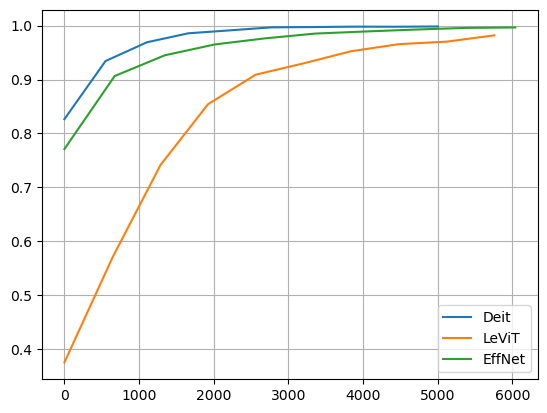

In [4]:
plot_by_time('top-1 Acc',True)

In [5]:
def calculate_median(column):
    print("median")
    print(f"effnet: \t{effnet[column].median()}")
    print(f"levit:  \t{levit[column].median()}")
    print(f"deit:   \t{deit[column].median()}")

In [6]:
calculate_median('seconds')

median
effnet: 	670.6565871238708
levit:  	639.1015104055405
deit:   	554.5802723169327


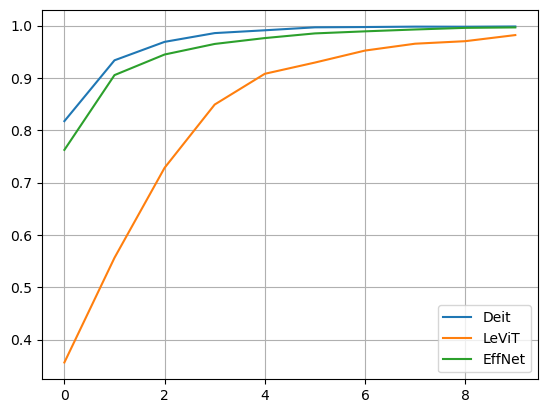

In [7]:
plot_by_epoch('F1-Score')

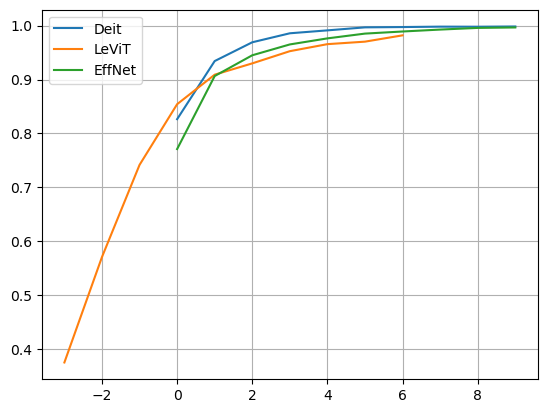

In [8]:
    plt.plot(deit['epoch'],deit["top-1 Acc"])
    plt.plot(levit['epoch']-3,levit["top-1 Acc"])
    plt.plot(effnet['epoch'],effnet["top-1 Acc"])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

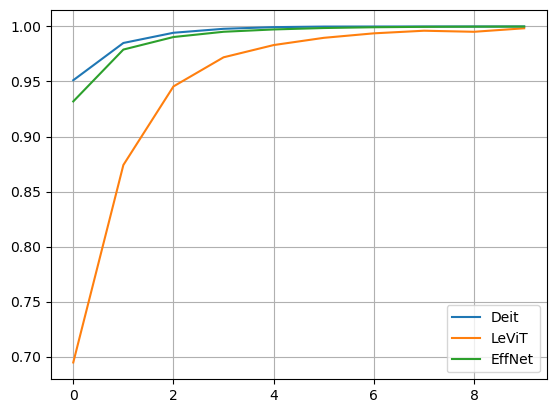

In [9]:
plot_by_epoch('top-5 Acc')